In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numba as nb
import time
import pandas as pd
import seaborn as sns
from numba import types
from numba.typed import Dict
from utils import *
from simulate import *
from plot import *

In [2]:
from numba.typed import Dict
weight_dict = Dict.empty(key_type=types.unicode_type, value_type=types.float64,)
neurons_dict = Dict.empty(key_type=types.unicode_type, value_type=types.int64,)
stim_dict = Dict.empty(key_type=types.unicode_type, value_type=types.int64,)
flag_dict = Dict.empty(key_type=types.unicode_type, value_type=types.int64,)
rates_dict = Dict.empty(key_type=types.unicode_type, value_type=types.float64,)
eta_dict = Dict.empty(key_type=types.unicode_type, value_type=types.float64,)
fixed_inp = Dict.empty(key_type=types.unicode_type, value_type=types.float64,)
stim_params = Dict.empty(key_type=types.unicode_type, value_type=types.float64,)

rates = Dict.empty(key_type=types.unicode_type, value_type=types.float64[:,:] )
weights = Dict.empty(key_type=types.unicode_type, value_type=types.float64[:])

weight_dict['wed']  = 1.5
weight_dict['wpe']  = 1.5
weight_dict['wpp']  = 0.5
weight_dict['wse']  = 1
weight_dict['wve']  = 1
weight_dict['wde']  = 1.5
weight_dict['wsv']  = 0.6
weight_dict['wvs']  = 0.5
weight_dict['wep']  = 3.19
weight_dict['wpv']  = 0.1312
weight_dict['wps']  = 0.7656
weight_dict['wds']  = 1.49


o_wep = 3.19
o_wpv = 0.13124999999999998 
o_wps = 0.765625 
o_wds = 1.49

stim = 3.5


rates_dict['re'] = 1.0
rates_dict['rd'] = 0.0
rates_dict['rp'] = 2.0
rates_dict['rs'] = 2.0
rates_dict['rv'] = 4.0

xE = rates_dict['re'] - weight_dict['wed'] * rates_dict['rd'] + o_wep * rates_dict['rp'] 
xD = 0
xP = rates_dict['rp']  * (1.0 + weight_dict['wpp']) - weight_dict['wpe'] * rates_dict['re'] + o_wps * rates_dict['rs'] + o_wpv * rates_dict['rv']
xS = rates_dict['rs'] - weight_dict['wse'] * rates_dict['re'] + weight_dict['wsv'] * rates_dict['rv'] 
xV = rates_dict['rv'] - weight_dict['wve'] * rates_dict['re'] + weight_dict['wvs'] * rates_dict['rs'] 

print(xE, xD, xP, xS, xV)

neurons_dict['Ne']  = 70
neurons_dict['Ni']  = 10

stim_dict['Ve']     = 1
stim_dict['Vp']     = 0
stim_dict['Mp']     = 1
stim_dict['Vs']     = 0
stim_dict['Ms']     = 1
stim_dict['Vv']     = 1
stim_dict['Mv']     = 0
stim_dict['Md']     = 1

stim_params['stim_value'] = stim
stim_params['stim_dur'] = 7 # test stimulus
stim_params['no_vis_stim'] = 1

fixed_inp['xe'] = xE
fixed_inp['xd'] = xD
fixed_inp['xp'] = xP
fixed_inp['xs'] = xS
fixed_inp['xv'] = xV

eta_dict['η1'] = 1e-6
eta_dict['η2'] = 1e-6
eta_dict['η3'] = 1e-7
eta_dict['η4'] = 1e-7

flag_dict['test'] = 1
flag_dict['opto_gen'] = 0
flag_dict['neuron_flag'] = 0
flag_dict['opto_val'] = 0


7.38 0 3.55625 3.4 4.0


In [3]:
# flag_dict['neuron_flag'] = 0
# flag_dict['opto_val'] = 5
# rates,weights = Simulate(weight_dict, neurons_dict, rates_dict, stim_dict, eta_dict, flag_dict, stim_params, fixed_inp, rates, weights)
# I_e = rates['Ie']



In [4]:
opt_vals = np.arange(-8,9,1)

### PC = V, PV = M

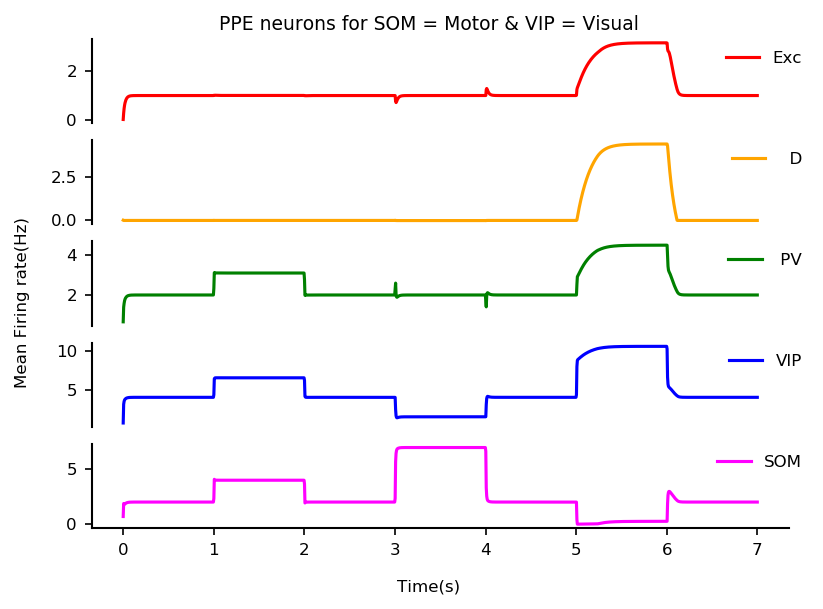

In [5]:
stim_dict['Ve']     = 1
stim_dict['Vp']     = 0
stim_dict['Mp']     = 1

rates,weights = Simulate(weight_dict, neurons_dict, rates_dict, stim_dict, eta_dict, flag_dict, stim_params, fixed_inp, rates, weights)
re = rates['re']
rd = rates['rd']
rs = rates['rs']
rv = rates['rv']
rp = rates['rp']

plot_rates(re,rd,rp,rv,rs,stim_params['stim_dur'],'val_ppe.png')

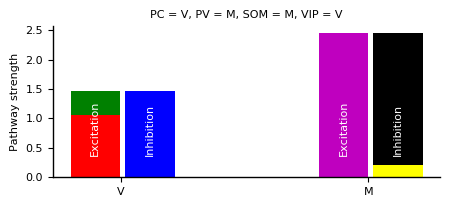

In [6]:
#Pathways 
stim_max = stim

V_exc = [(1-weight_dict['wsv']*weight_dict['wvs'])*(1+weight_dict['wpp']), weight_dict['wep']*weight_dict['wpv']]#  Direct Ve,  VIP to PV to PC 
V_inh = weight_dict['wep']*weight_dict['wps']*weight_dict['wsv']          # VIP to SOM to PV to PC
M_exc = weight_dict['wep']*weight_dict['wps']              # SOM to PV to PC
M_inh = [weight_dict['wep']*weight_dict['wpv']*weight_dict['wvs'] , (1-weight_dict['wsv']*weight_dict['wvs'])* weight_dict['wep']] # SOM to VIP to PV to PC and PV to PC
ind = [0,0.11,0.5,0.61]
width = 0.1
E = [V_exc,M_exc]
I = [V_inh,M_inh]
plt.figure(figsize=(5,2),dpi=100)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
p1 = plt.bar(ind[0], E[0][0], width, color='r')
p1 = plt.bar(ind[0], E[0][1], width, bottom=E[0][0], color='g')
p2 = plt.bar(ind[1], I[0], width,  color='b')
p3 = plt.bar(ind[2], E[1], width,  color='m')
p4 = plt.bar(ind[3], I[1][0], width, color="yellow")
p4 = plt.bar(ind[3], I[1][1], width, bottom=I[1][0], color='black')
plt.xticks([0.052,0.55],['V','M'])
plt.ylabel("Pathway strength")
plt.title("PC = V, PV = M, SOM = M, VIP = V")
plt.text(ind[0], 0.4, 'Excitation', horizontalalignment='center',rotation=90,color="white")
plt.text(ind[1], 0.4, 'Inhibition', horizontalalignment='center',rotation=90,color="white")
plt.text(ind[2], 0.4, 'Excitation', horizontalalignment='center',rotation=90,color="white")
plt.text(ind[3], 0.4, 'Inhibition', horizontalalignment='center',rotation=90,color="white")
plt.savefig('Results/Bal_path_PC_V_PV_M.png')
plt.show()       
         

### PC = V, PV = V

0.26489028213166144
7.38 0 4.148902821316614 3.4 4.0


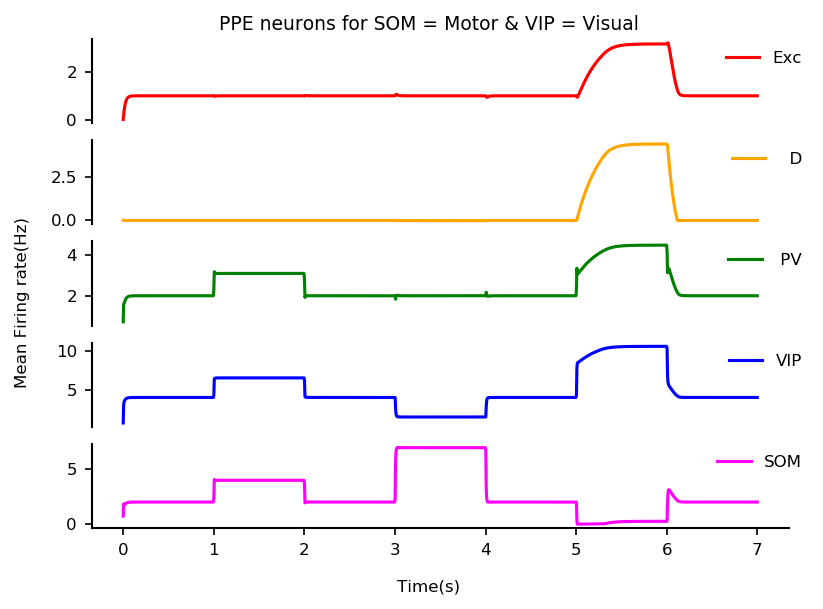

In [7]:
stim_dict['Ve']     = 1
stim_dict['Vp']     = 1
stim_dict['Mp']     = 0
flag_dict['opto_gen'] = 0

weight_dict['wpv']  = 1-((1+weight_dict['wpp'])/weight_dict['wep'])
weight_dict['wps']  = weight_dict['wvs']*weight_dict['wpv']
print(weight_dict['wps'])

rates_dict['re'] = 1.0
rates_dict['rd'] = 0.0
rates_dict['rp'] = 2.0
rates_dict['rs'] = 2.0
rates_dict['rv'] = 4.0

xE = rates_dict['re'] - weight_dict['wed'] * rates_dict['rd'] + o_wep * rates_dict['rp'] 
xD = 0
xP = rates_dict['rp']  * (1.0 + weight_dict['wpp']) - weight_dict['wpe'] * rates_dict['re'] + weight_dict['wps'] * rates_dict['rs'] + weight_dict['wpv'] * rates_dict['rv']
xS = rates_dict['rs'] - weight_dict['wse'] * rates_dict['re'] + weight_dict['wsv'] * rates_dict['rv'] 
xV = rates_dict['rv'] - weight_dict['wve'] * rates_dict['re'] + weight_dict['wvs'] * rates_dict['rs'] 
fixed_inp['xe'] = xE
fixed_inp['xd'] = xD
fixed_inp['xp'] = xP
fixed_inp['xs'] = xS
fixed_inp['xv'] = xV

print(xE, xD, xP, xS, xV)

rates,weights = Simulate(weight_dict, neurons_dict, rates_dict, stim_dict, eta_dict, flag_dict, stim_params, fixed_inp, rates, weights)
re = rates['re']
rd = rates['rd']
rs = rates['rs']
rv = rates['rv']
rp = rates['rp']

plot_rates(re,rd,rp,rv,rs,stim_params['stim_dur'],'val_ppe_pc_v_pv_v.png')

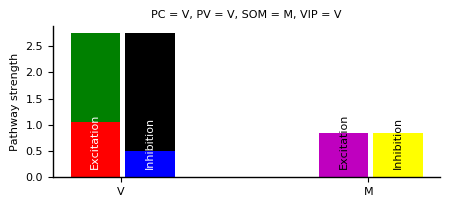

In [8]:

V_exc = [(1-weight_dict['wsv']*weight_dict['wvs'])*(1+weight_dict['wpp']), weight_dict['wep']*weight_dict['wpv']]#  Direct Ve,  VIP to PV to PC 
V_inh = [weight_dict['wep']*weight_dict['wps']*weight_dict['wsv'], (1-weight_dict['wsv']*weight_dict['wvs'])* weight_dict['wep']]          # VIP to SOM to PV to PC
M_exc = weight_dict['wep']*weight_dict['wps']              # SOM to PV to PC
M_inh = [weight_dict['wep']*weight_dict['wpv']*weight_dict['wvs'] ] # SOM to VIP to PV to PC 


ind = [0,0.11,0.5,0.61]
width = 0.1
E = [V_exc,M_exc]
I = [V_inh,M_inh]
plt.figure(figsize=(5,2),dpi=100)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
p1 = plt.bar(ind[0], E[0][0], width, color='r')
p1 = plt.bar(ind[0], E[0][1], width, bottom=E[0][0], color='g')
p2 = plt.bar(ind[1], I[0][0], width,  color='b')
p2 = plt.bar(ind[1], I[0][1], width, bottom=I[0][0], color='black')
p3 = plt.bar(ind[2], E[1], width,  color='m')
p4 = plt.bar(ind[3], I[1], width, color="yellow")

plt.xticks([0.052,0.55],['V','M'])
plt.ylabel("Pathway strength")
plt.title("PC = V, PV = V, SOM = M, VIP = V")
plt.text(ind[0], 0.2, 'Excitation', horizontalalignment='center',rotation=90,color="white")
plt.text(ind[1], 0.2, 'Inhibition', horizontalalignment='center',rotation=90,color="white")
plt.text(ind[2], 0.2, 'Excitation', horizontalalignment='center',rotation=90,color="black")
plt.text(ind[3], 0.2, 'Inhibition', horizontalalignment='center',rotation=90,color="black")
plt.savefig('Results/Bal_path_PC_V_PV_V.png')
plt.show()

### PC = X, PV = V

7.38 0 6.5 3.4 4.0


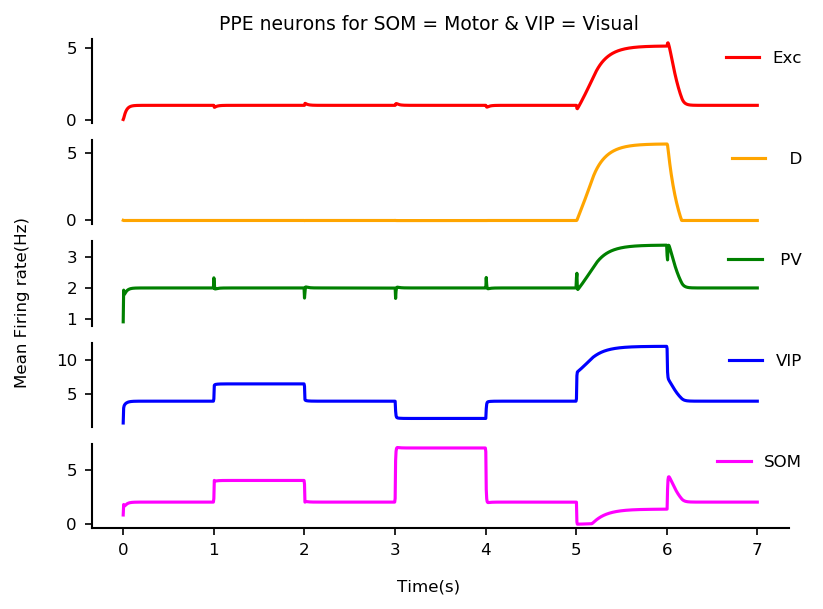

In [9]:
stim_dict['Ve']     = 0
stim_dict['Vp']     = 1
stim_dict['Mp']     = 0
flag_dict['opto_gen'] = 0

rates_dict['re'] = 1.0
rates_dict['rd'] = 0.0
rates_dict['rp'] = 2.0
rates_dict['rs'] = 2.0
rates_dict['rv'] = 4.0

weight_dict['wpv']  = 1
weight_dict['wps']  = weight_dict['wvs']*weight_dict['wpv']


xE = rates_dict['re'] - weight_dict['wed'] * rates_dict['rd'] + o_wep * rates_dict['rp'] 
xD = 0
xP = rates_dict['rp']  * (1.0 + weight_dict['wpp']) - weight_dict['wpe'] * rates_dict['re'] + weight_dict['wps'] * rates_dict['rs'] + weight_dict['wpv'] * rates_dict['rv']
xS = rates_dict['rs'] - weight_dict['wse'] * rates_dict['re'] + weight_dict['wsv'] * rates_dict['rv'] 
xV = rates_dict['rv'] - weight_dict['wve'] * rates_dict['re'] + weight_dict['wvs'] * rates_dict['rs'] 
fixed_inp['xe'] = xE
fixed_inp['xd'] = xD
fixed_inp['xp'] = xP
fixed_inp['xs'] = xS
fixed_inp['xv'] = xV

print(xE, xD, xP, xS, xV)
# w_ep = ((1+w_pp) * (xE - rho_e - xV - w_ve*rho_e))/(xP + w_pe*rho_e-xS-w_se*rho_e)
# w_ds = ((xD + w_de*rho_e+ smax )*(1-w_sv * w_vs ))/(xS+(1-w_sv )*rho_e - w_sv*xV + (1-w_sv)*smax)
# print(w_ep,w_pv,w_ps,w_ds)
rates,weights = Simulate(weight_dict, neurons_dict, rates_dict, stim_dict, eta_dict, flag_dict, stim_params, fixed_inp, rates, weights)
re = rates['re']
rd = rates['rd']
rs = rates['rs']
rv = rates['rv']
rp = rates['rp']

plot_rates(re,rd,rp,rv,rs,stim_params['stim_dur'],'val_ppe_pc_x_pv_v.png')

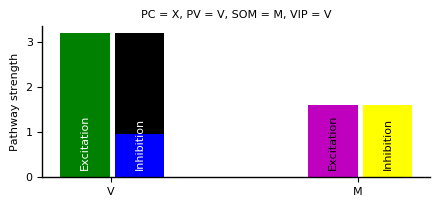

In [10]:
V_exc = [weight_dict['wep']*weight_dict['wpv']]             # VIP to PV to PC 
V_inh = [weight_dict['wep']*weight_dict['wps']*weight_dict['wsv'], (1-weight_dict['wsv']*weight_dict['wvs'])* weight_dict['wep']]  # VIP to SOM to PV to PC and PV to PC
M_exc = weight_dict['wep']*weight_dict['wps']                   # SOM to PV to PC
M_inh = [weight_dict['wep']*weight_dict['wpv']*weight_dict['wvs'] ]       # SOM to VIP to PV to PC 


ind = [0,0.11,0.5,0.61]
width = 0.1
E = [V_exc,M_exc]
I = [V_inh,M_inh]
plt.figure(figsize=(5,2),dpi=100)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
p1 = plt.bar(ind[0], E[0][0], width, color='g')
p2 = plt.bar(ind[1], I[0][0], width,  color='b')
p2 = plt.bar(ind[1], I[0][1], width, bottom=I[0][0], color='black')
p3 = plt.bar(ind[2], E[1], width,  color='m')
p4 = plt.bar(ind[3], I[1][0], width, color="yellow")


plt.xticks([0.052,0.55],['V','M'])
plt.ylabel("Pathway strength")
plt.title("PC = X, PV = V, SOM = M, VIP = V")
plt.text(ind[0], 0.2, 'Excitation', horizontalalignment='center',rotation=90,color="white")
plt.text(ind[1], 0.2, 'Inhibition', horizontalalignment='center',rotation=90,color="white")
plt.text(ind[2], 0.2, 'Excitation', horizontalalignment='center',rotation=90,color="black")
plt.text(ind[3], 0.2, 'Inhibition', horizontalalignment='center',rotation=90,color="black")
plt.savefig('Results/Bal_path_PC_X_PV_V.png')
plt.show()

### PC = X, PV = M

1.0
7.38 0 5.9 3.4 4.0


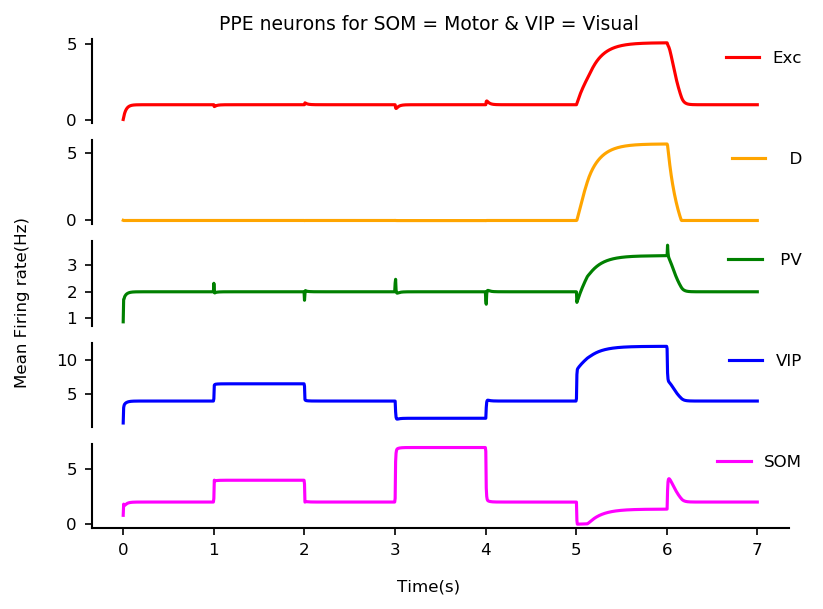

In [11]:
stim_dict['Ve']     = 0
stim_dict['Vp']     = 0
stim_dict['Mp']     = 1
flag_dict['opto_gen'] = 0

weight_dict['wpv']  = weight_dict['wsv']
weight_dict['wps']  = weight_dict['wvs']*weight_dict['wpv'] + (1-weight_dict['wsv']*weight_dict['wvs'])
print(weight_dict['wps'])

rates_dict['re'] = 1.0
rates_dict['rd'] = 0.0
rates_dict['rp'] = 2.0
rates_dict['rs'] = 2.0
rates_dict['rv'] = 4.0
xE = rates_dict['re'] - weight_dict['wed'] * rates_dict['rd'] + o_wep * rates_dict['rp'] 
xD = 0
xP = rates_dict['rp']  * (1.0 + weight_dict['wpp']) - weight_dict['wpe'] * rates_dict['re'] + weight_dict['wps'] * rates_dict['rs'] + weight_dict['wpv'] * rates_dict['rv']
xS = rates_dict['rs'] - weight_dict['wse'] * rates_dict['re'] + weight_dict['wsv'] * rates_dict['rv'] 
xV = rates_dict['rv'] - weight_dict['wve'] * rates_dict['re'] + weight_dict['wvs'] * rates_dict['rs'] 
fixed_inp['xe'] = xE
fixed_inp['xd'] = xD
fixed_inp['xp'] = xP
fixed_inp['xs'] = xS
fixed_inp['xv'] = xV
print(xE, xD, xP, xS, xV)
rates,weights = Simulate(weight_dict, neurons_dict, rates_dict, stim_dict, eta_dict, flag_dict, stim_params, fixed_inp, rates, weights)
re = rates['re']
rd = rates['rd']
rs = rates['rs']
rv = rates['rv']
rp = rates['rp']

plot_rates(re,rd,rp,rv,rs,stim_params['stim_dur'],'val_ppe_pc_x_pv_m.png')

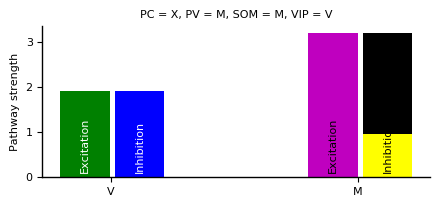

In [12]:
V_exc = [weight_dict['wep']*weight_dict['wpv']]             # VIP to PV to PC 
V_inh = [weight_dict['wep']*weight_dict['wps']*weight_dict['wsv']]        # VIP to SOM to PV to PC 
M_exc = weight_dict['wep']*weight_dict['wps']             # SOM to PV to PC
M_inh = [weight_dict['wep']*weight_dict['wpv']*weight_dict['wvs'],(1-weight_dict['wsv']*weight_dict['wvs'])* weight_dict['wep'] ]  # SOM to VIP to PV to PC and PV to PC

ind = [0,0.11,0.5,0.61]
width = 0.1
E = [V_exc,M_exc]
I = [V_inh,M_inh]
plt.figure(figsize=(5,2),dpi=100)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
p1 = plt.bar(ind[0], E[0][0], width, color='g')
p2 = plt.bar(ind[1], I[0][0], width,  color='b')
p3 = plt.bar(ind[2], E[1], width,  color='m')
p4 = plt.bar(ind[3], I[1][0], width, color="yellow")
p4 = plt.bar(ind[3], I[1][1], width, bottom=I[1][0], color='black')


plt.xticks([0.052,0.55],['V','M'])
plt.ylabel("Pathway strength")
plt.title("PC = X, PV = M, SOM = M, VIP = V")
plt.text(ind[0], 0.15, 'Excitation', horizontalalignment='center',rotation=90,color="white")
plt.text(ind[1], 0.15, 'Inhibition', horizontalalignment='center',rotation=90,color="white")
plt.text(ind[2], 0.15, 'Excitation', horizontalalignment='center',rotation=90,color="black")
plt.text(ind[3], 0.15, 'Inhibition', horizontalalignment='center',rotation=90,color="black")
plt.savefig('Results/Bal_path_PC_X_PV_M.png')
plt.show()